<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/MLNoSupervisado_Caso_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 4286 bytes


---
# Caso Mall Customers

Se cuenta con un dataset de clientes de un importante mall de la ciudad. Los datos son los siguientes:

- CustomerID: correlativo identificador del cliente
- Genre: sexo del cliente
- Age: edad del cliente
- Annual Income: sueldo anual en miles de dolares
- Spending Score: score de gasto calculado para el cliente, mientras mayor más gasta

Se busca realizar una caracterización de los clientes, para lo cual se le solicita que realice una **Clusterización Jerárquica** considerando solamente las variables **Annual Income** y **Spending Score**. Se busca contestar las siguientes preguntas:

- Cuántos clusters se aprecian
- Qué grupo de clientes es representado en cada cluster

---

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Carga de datos

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Formulación del Modelo

In [9]:
X = dataset.iloc[:,3:5]

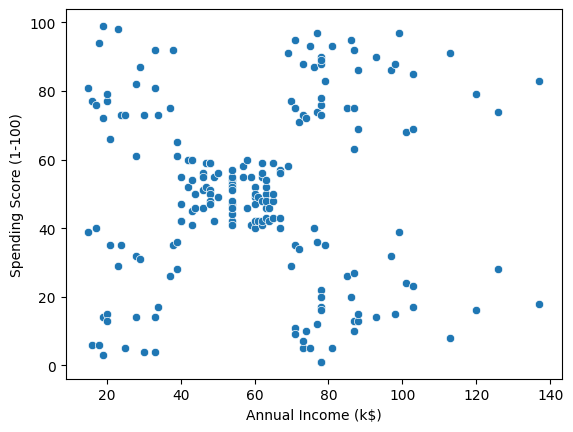

In [15]:
sns.scatterplot(data=X, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

### Escalamiento

In [16]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ['Annual Income (k$)', 'Spending Score (1-100)']

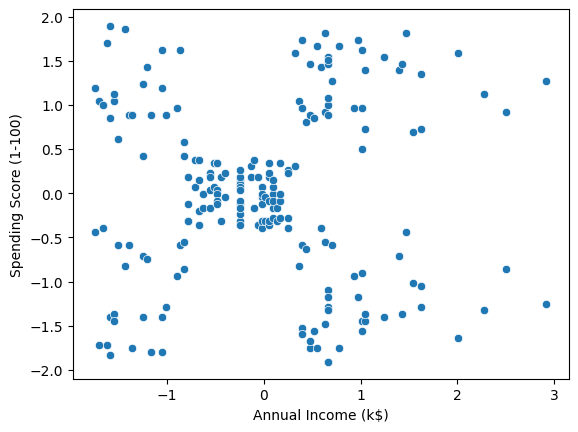

In [24]:
sns.scatterplot(data = X_transformed, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

### Clusterización Jerárquica

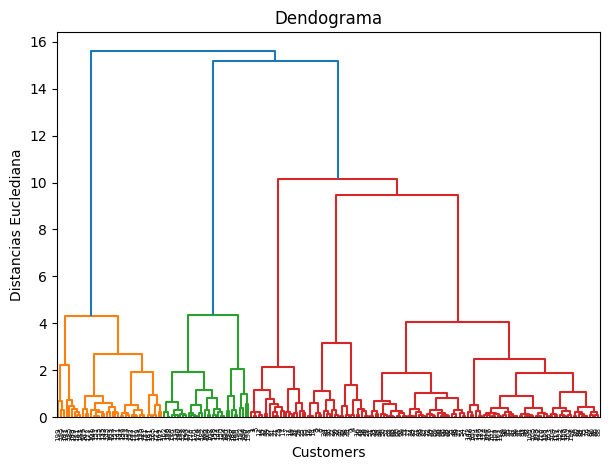

In [32]:
plt.figure(figsize=(7,5))

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram (sch.linkage (X_transformed, method = 'ward'))
plt.title('Dendograma')
plt.xlabel('Customers')
plt.ylabel('Distancias Euclediana')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 5, metric = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(X_transformed)

In [43]:
label = pd.DataFrame(y_hc)
label.columns = ['label']
label.head(3)

,label
0,4
1,3
2,4


In [44]:
X_transformed.head(3)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [45]:
result = X_transformed.join(label)

In [47]:
result.head(3)

,Annual Income (k$),Spending Score (1-100),label
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4


### Grafique los resultados

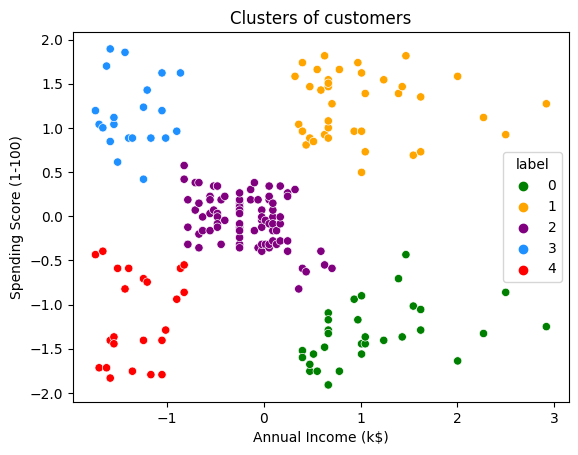

In [50]:
sns.scatterplot(data = result,
                x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue ='label',
                palette=['green','orange','purple','dodgerblue','red'],
                legend='full')

plt.title('Clusters of customers')
plt.show()

### Modifique dataset original con resultados de la clusterización

In [56]:
final = dataset.join(label)

In [58]:
condiciones = [
    (final['label'] == 0),
    (final['label'] == 1),
    (final['label'] == 2),
    (final['label'] == 3),
    (final['label'] == 4),
    ]

valores = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','Cluster5']

final['label'] = np.select(condiciones, valores)


In [63]:
final.rename(columns = {'label':'Clusteres'}, inplace = True)

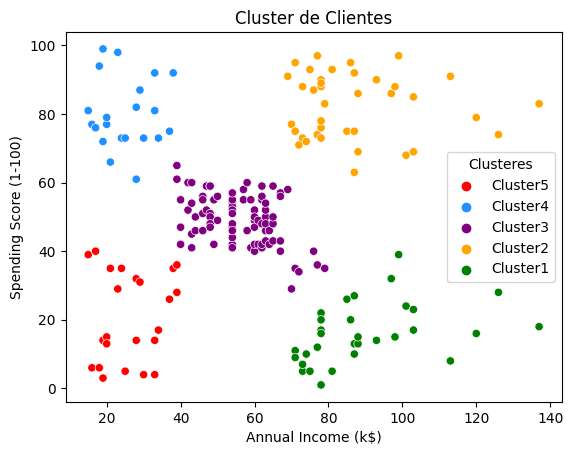

In [64]:
sns.scatterplot(data= final ,
                x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue ='Clusteres',
                palette=['red','dodgerblue','purple','orange','green'],
                legend='full')

plt.title('Cluster de Clientes')
plt.show()

_En relación a los ingresos anuales en miles y el puntaje generado por la tienda, observamos un grupo de clientes que podrían ser de interés para la tienda._

* El grupo de clientes en amarillo, que tienen altos ingresos y una alta puntuación, por lo que podrían ser un grupo objetivo para ciertas promociones.
* El grupo de clientes en azul, que tienen bajos ingresos y una alta puntuación, tambien podrían ser un grupo objetivo para ciertas promociones.
* En rojo tenemos clientes de bajos ingresos y de bajo puntaje.
* En morado tenemos clientes de bajos ingresos pero de alto puntaje, lo que puede indicar que estos clientes compran mucho a pesar de sus bajos ingresos.

Es decir, el análisis de conglomerados permite hacer inferencias y tomar decisiones de negocio.
